/home/oikura/synchronization/IT/Yulia/Li/dist_out
/home/oikura/synchronization/IT/Yulia/Na/dist_out
/home/oikura/synchronization/IT/Yulia/K/dist_out
/home/oikura/synchronization/IT/Yulia/Cs/dist_out
/home/oikura/synchronization/IT/Yulia/Rb/dist_out


<Figure size 2880x2880 with 0 Axes>

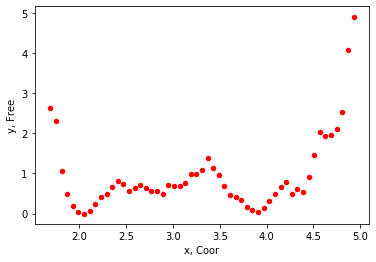

<Figure size 2880x2880 with 0 Axes>

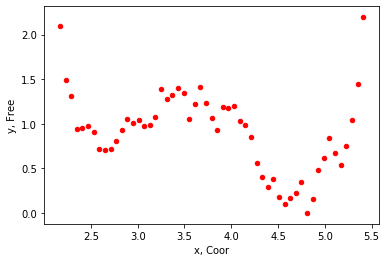

<Figure size 2880x2880 with 0 Axes>

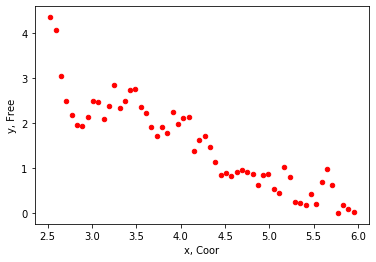

<Figure size 2880x2880 with 0 Axes>

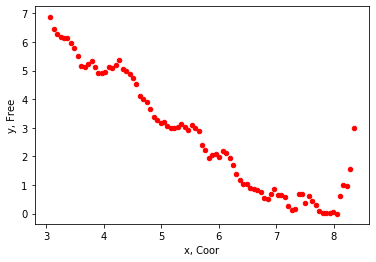

<Figure size 2880x2880 with 0 Axes>

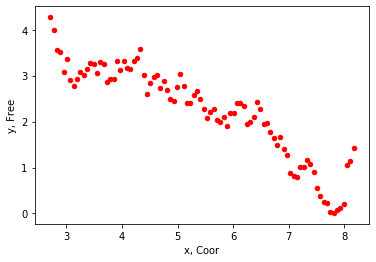

In [7]:
import os, sys
#Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import numpy as np
import statsmodels.formula.api as smf
from scipy.interpolate import make_interp_spline, BSpline

###### какой атом анализируем?###############################################################################
atom_list = ["Li", "Na", "K", "Cs", "Rb"]

for atom in atom_list:
######################################################################################################################

    working_location = os.chdir("/home/oikura/synchronization/IT/Yulia/%s/dist_out" % (atom)) # перемещение процесса в локацию не нужно и дает ошибку когда работаешь с относительными путями
    working_location = os.getcwd()
    print(working_location)

    #read wham output data
    data = pd.read_csv(working_location + "/%s.out" % (atom), sep='\s+') # без header=None так как хочу обращаться к столбцам по легенде

    #чистим данные от NaN
    data = data.fillna(0) #заполняем нулями отсутствующие данные NaN
    indexNaN = data['Prob'] == 0 #получаем датафрейм в котором в столбце Prob нули
    index_drop_NaN = data[indexNaN].index #получаем индексы строк, которые надо дропнуть
    data.drop(index_drop_NaN, inplace=True) #дропаем
    # print (data) #просмотр полученного фрейма

    graph_df = pd.DataFrame({"x, Coor": data ["#Coor"], 'y, Free': data ["Free"]}) #creating array for plotting
    # print (graph_df)

    plt.figure(figsize = (40,40))
    graph_df=graph_df.astype(float)

#     # вытаскиваем из датафрейма листы с переменными которые будем фиттить
#     x = graph_df ["x, Coor"].to_list()
#     y = graph_df ["y, Free"].to_list()
#     print (x, y)
#     fitted_data = pd.DataFrame(columns=['y', 'x'])
#     fitted_data['x'] = x
#     fitted_data['y'] = y

#     # 300 represents number of points to make between T.min and T.max
#     xnew = np.linspace(np.array(x).min(), np.array(x).max(), 100) 
#     # сглаживание кривой
#     spl = make_interp_spline(x, y, k=7)  # type: BSpline
#     y_smooth = spl(xnew)
#     plt.scatter(x, y, color='red')
#     plt.plot(xnew, y_smooth)
#     plt.show()

    # # регрессия
    # degree = 100
    # weights = np.polyfit(x, y, degree)
    # model = np.poly1d(weights)
    # results = smf.ols(formula='y ~ model(x)', data=fitted_data).fit()
    # print(results.summary()) # результаты регрессии
    # plt.scatter(x, y)
    # myline = np.linspace(2.5, 5.3, 5)
    # plt.plot(myline, mymodel(myline))

    graph_df.plot(kind='scatter',x='x, Coor',y='y, Free', color='red')

    # показать график
   
plt.show()
